# <center>MVTS Data Toolkit</center>
## <center>A Toolkit for Pre-processing Multivariate Time Series Data</center>

<img src="https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/MVTS_Data_Toolkit_icon2.png">

* **Title:** MVTS Data Toolkit: A Toolkit for Pre-processing Multivariate Time Series Data
* **Journal:** SoftwareX Journal [$\triangleright$](https://www.journals.elsevier.com/softwarex)(Elsevier)
* **Authors:** Azim Ahmadzadeh [$\oplus$](https://www.azim-a.com/), Kankana Sinha [$\ominus$](https://www.linkedin.com/in/kankana-sinha-4b4b13131/), Berkay Aydin [$\otimes$](https://grid.cs.gsu.edu/~baydin2/), Rafal A. Angryk [$\oslash$](https://grid.cs.gsu.edu/~rangryk/)
* **Demo Author:** Azim Ahmadzadeh
* **Last Modified:** May 02, 2020

## Intro

This demo gives a quick tour over the toolkit's funcionalities. Here I will:
 1. download a multi-class dataset of 2000 multivariate time series (mvts) instances,
 2. show how the configuration file can be prepared,
 3. get some basic statistics about the data,
 4. extract multiple statistical features from the mvts instances, and visualize the results,
 5. analyze the extracted-feature data,
 6. normalize the extracted features,
 7. sample the extracted data to obtain a different ratios of the five classes.

In [1]:
import os
import yaml
import urllib.request
from mvtsdatatoolkit.data.data_retriever import DataRetriever  # for downloading data
import CONSTANTS as CONST
%matplotlib inline

## 1. Download the Dataset
In this demo I use an example dataset. In the following cells, it will be automatically downloaded. But in case something goes wrong, here is the direct link:
https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip
. Please note that here I am using the class `DataRetriever` that I implemented. This is only implemented for the purpose of this demo and is not one of the generic tools to be used for any other datasets.

Before we download it, let's take a quick look:

In [2]:
dr = DataRetriever(1)
dr.print_info()

URL:		https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip
NAME:		petdataset_01.zip
TYPE:		application/zip
SIZE:		32M


Ready to download? This may take a few seconds, depending on your internet bandwidth. Wait for the progress bar.

In [3]:
where_to = './temp/'  # Don't change this path.
dr.retrieve(target_path = where_to)

Extracting: 100%|██████████| 2001/2001 [00:00<00:00, 4165.84it/s]


OK. Let's see how many files are available to us now.

In [4]:
dr.get_total_number_of_files()

2000

## 2. Setup Configurations
For tasks such as feature extraction (module: `features.feature_extractor`) and data analysis (modules: `data_analysis.mvts_data_analysis` and `data_analysis.extracted_features_analysis`) a configuration file must be provided by the user.

This configuration file is a `yml` file, specificly defined for the dataset of interest and can be stored anywhere the user wish.

Here, we download and use our own configuration file as an example.

In [5]:
conf_url = 'https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/demo_configs.yml'
path_to_config = './demo_configs.yml'
urllib.request.urlretrieve(conf_url, path_to_config)

('./demo_configs.yml', <http.client.HTTPMessage at 0x79e5f75bba90>)

Let's take a look at the content of the config file which is located at `./demo_configs.yml`:

In [6]:
with open(path_to_config, 'r') as f:
    print(f.read())

PATH_TO_MVTS: './temp/petdataset_01/'
PATH_TO_EXTRACTED_FEATURES: './temp/extracted_features/'
META_DATA_TAGS: ['id', 'lab', 'st', 'et']
MVTS_PARAMETERS:
  - 'TOTUSJH'
  - 'TOTBSQ'
  - 'TOTPOT'
  - 'TOTUSJZ'
  - 'ABSNJZH'
  - 'SAVNCPP'
  - 'USFLUX'
  - 'TOTFZ'
  - 'MEANPOT'
  - 'EPSZ'
  - 'MEANSHR'
  - 'SHRGT45'
  - 'MEANGAM'
  - 'MEANGBT'
  - 'MEANGBZ'
  - 'MEANGBH'
  - 'MEANJZH'
  - 'TOTFY'
  - 'MEANJZD'
  - 'MEANALP'
  - 'TOTFX'
  - 'EPSY'
  - 'EPSX'
  - 'R_VALUE'
STATISTICAL_FEATURES:
  - 'get_min'
  - 'get_max'
  - 'get_median'
  - 'get_mean'
  - 'get_stddev'
  - 'get_var'
  - 'get_skewness'
  - 'get_kurtosis'
  - 'get_no_local_maxima'
  - 'get_no_local_minima'
  - 'get_no_local_extrema'
  - 'get_no_zero_crossings'
  - 'get_mean_local_maxima_value'
  - 'get_mean_local_minima_value'
  - 'get_no_mean_local_maxima_upsurges'
  - 'get_no_mean_local_minima_downslides'
  - 'get_difference_of_mins'
  - 'get_difference_of_maxs'
  - 'get_difference_of_means'
  - 'get_difference_of_stds'
  -

Here is the break-down of the pieces:
 - `PATH_to_MVTS`: A relative or absolute path to where the multivariate time series dataset is stored at.
 - `PATH_TO_EXTRACTED`: A relative or absolute path to where the extracted features should be stored at, using the Feature Extraction component of the package.
 - `META_DATA_TAGS`: A list of tags based on which some pieces of information can be extracted from the file-names of the multivariate time series. For example, if timestamps are encoded in the file-names, e.g., `_st[YYYY-MM-DD HH:MM:SS]`, then the string `st` (without brackets) is a tag that can be included in this list. In the feature extraction process, this will add the corresponding metadata (i.e., what is wrapped in the square brackets) in each filename, as an extra column to the data-frame of the extracted features. Generally, using this functionality, any extra metadata (e.g., class labels, start-time, end-time, id's, etc) can be encoded in the file-names and consequently passed into the extracted features.
 - `MVTS_PARAMETERS`: A list of parameter-names that are used in the multivariate time series dataset, whose statistical features are of interest. These are, in other words, the column-names in the multivariate time series files.
 - `STATISTICAL_FEATURES`: A list of statistical features of interest to be extracted from the multivariate time series. They must be chosen from the provided methods in the module `features.feature_collection.`. For example, `get_min` is a valid feature-name as this method is implemented in the package.
 
 In the following steps, you will see how this can be used.

## 3. Analysis of Raw Data (MVTS Data Analysis)

- #### How many files? How large of a dataset?

Using `mvts_data_analysis` module users can get an idea of the dataset they are going to work on. I start with creating an instance of the `MVTSDataAnalysis` class. This right away gives me some high-level information about the dataset.

In [7]:
from mvtsdatatoolkit.data_analysis.mvts_data_analysis import MVTSDataAnalysis

mvda = MVTSDataAnalysis(path_to_config)
mvda.print_stat_of_directory()

----------------------------------------
Directory:			./temp/petdataset_01/
Total no. of files:	2000
Total size:			76M
Total average:		38K
----------------------------------------


- #### Get a summary stats of the data.

Let's now get some statistics from the content of the files. To speed up the demo, I analyze only 3 time series parameters (namely `TOTUSJH`, `TOTBSQ`, and `TOTPOT`), and only the first 50 mvts files.

In [8]:
params = ['TOTUSJH', 'TOTBSQ', 'TOTPOT']
n = 50
mvda.compute_summary(params_name=params, first_k=n)
mvda.summary

Parameter-Name  Val-Count  Null-Count          mean           min  \
0        TOTUSJH       2999           1  6.318923e+02  6.527275e+00   
1         TOTBSQ       2999           1  8.860965e+09  3.265679e+07   
2         TOTPOT       2999           1  1.443210e+23  2.627686e+20   

           25th          50th          75th           max  
0  4.655888e+01  1.183843e+02  3.922363e+02  5.406299e+03  
1  3.872637e+08  1.046140e+09  5.325781e+09  1.056942e+11  
2  2.539921e+21  6.968412e+21  6.679082e+22  2.036020e+24

... which says the length of the time series, across the 50 mvts files is 3000, including 0 `NA/NAN` values. In addition, `mean`, `min`, `max`, and three quantiles are calculated for each time series.

 - #### You have a LARGE dataset?
 A parallel version of this function is also provided to help process much larger datasets efficiently. Below, we will have 4 processes to compute the summary statistics.

In [9]:
mvda.compute_summary_in_parallel(n_jobs=4, first_k=50, verbose=False,
                                     params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'])
mvda.summary

Parameter-Name  Val-Count  Null-Count          mean           min  \
0        TOTUSJH       2999           1  6.332585e+02  6.527275e+00   
1         TOTBSQ       2999           1  8.896376e+09  3.265679e+07   
2         TOTPOT       2999           1  1.453346e+23  2.627686e+20   

           25th          50th          75th           max  
0  4.667433e+01  1.182381e+02  3.875508e+02  5.406299e+03  
1  3.844617e+08  1.044386e+09  5.286232e+09  1.056942e+11  
2  2.543999e+21  6.979030e+21  6.693212e+22  2.036020e+24

**Note**: The results of the parallel and sequential versions of `mvts_data_analysis` are not exactly identical. This discrepency is due to the fact that in the parallel version, the program has to approximate the percentiles. More specifically, it is designed to avoid loading the entire dataset into memory so that it is not confined to any particular data size. Therefore, it relies on some statistical estimators to approximate the percentiles with some acceptable error. The errors decrease significantly as the number of mvts files increases. In conclusion, for small datasets I recommend using the sequential version.

## 4. Feature Extraction

- #### What statistical features are available?

Now that we have an idea about our raw data, let's extract some features from the data. A list of 48 statistical features are implemented in `feature_collection`. Let's take a look at them.

In [10]:
import mvtsdatatoolkit.features.feature_collection as fc
help(fc)

Help on module mvtsdatatoolkit.features.feature_collection in mvtsdatatoolkit.features:

NAME
    mvtsdatatoolkit.features.feature_collection

FUNCTIONS
    get_average_absolute_change(uni_ts: Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average absolute first difference of a univariate time series.
    
    get_average_absolute_derivative_change(uni_ts: Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average absolute first difference of a derivative of univariate time series.
    
    get_avg_mono_decrease_slope(uni_ts: Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average slope of monotonically decreasing segments.
    
    get_avg_mono_increase_slope(uni_ts: Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: The average slope of monotonically increasing segments.
    
    get_dderivative_kurtosis(uni_ts: Union[pandas.core.series.Se

- #### How to extract these features from the data?

Let's extract 3 simple statistical features, namely `min`, `max`, and `median`, from 3 parameters, such as `TOTUSJH`, `TOTBSQ`, and `TOTPOT`. Again, to speed up the process in this demo, we only process the first 50 mvts files.

In [11]:
from mvtsdatatoolkit.features.feature_extractor import FeatureExtractor

fe = FeatureExtractor(path_to_config)
fe.do_extraction(features_name=['get_min', 'get_max', 'get_median'],
                 params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'], first_k=50)
fe.df_all_features

id lab                   st                   et  TOTUSJH_min  \
0   3439  NF  2013-12-03T11:12:00  2013-12-03T23:00:00    32.107186   
1   3397  NF  2013-11-17T02:00:00  2013-11-17T13:48:00    29.980564   
2   3444  NF  2013-12-03T19:12:00  2013-12-04T07:00:00     7.072219   
3   3482  NF  2013-12-11T06:24:00  2013-12-11T18:12:00   229.818735   
4   3569  NF  2014-01-05T07:00:00  2014-01-05T18:48:00    56.514168   
5   3341   M  2013-11-04T04:12:00  2013-11-04T16:00:00  4191.941351   
6   3320  NF  2013-11-02T02:12:00  2013-11-02T14:00:00    31.949661   
7   3444  NF  2013-12-02T22:12:00  2013-12-03T10:00:00     9.956649   
8   3576  NF  2014-01-05T18:12:00  2014-01-06T06:00:00    33.794695   
9   3535   C  2013-12-26T19:48:00  2013-12-27T07:36:00  1113.167991   
10  3446  NF  2013-12-05T00:36:00  2013-12-05T12:24:00    87.949638   
11  3350  NF  2013-11-04T23:48:00  2013-11-05T11:36:00    92.547335   
12  3306  NF  2013-10-28T17:24:00  2013-10-29T05:12:00    42.361829   
13  3688   C  2014-02-04T18:00:00  2014-02-05T05:48:00  2741.301006   
14  3515  NF  2013-12-22T10:24:00  2013-12-22T22:12:00   265.901593   
15  3481  NF  2013-12-08T17:12:00  2013-12-09T05:00:00   113.037076   
16  3267  NF  2013-10-14T19:00:00  2013-10-15T06:48:00   331.524291   
17  3267  NF  2013-10-09T06:00:00  2013-10-09T17:48:00    55.773312   
18  3497   M  2013-12-21T06:24:00  2013-12-21T18:12:00  2908.991954   
19  3494  NF  2013-12-11T06:48:00  2013-12-11T18:36:00     6.527275   
20  3368  NF  2013-11-15T02:48:00  2013-11-15T14:36:00   486.678963   
21  3529  NF  2013-12-22T08:48:00  2013-12-22T20:36:00    47.623049   
22  3401  NF  2013-11-17T11:00:00  2013-11-17T22:48:00    24.965024   
23  3465  NF  2013-12-06T03:12:00  2013-12-06T15:00:00   988.472841   
24  3394  NF  2013-11-16T18:48:00  2013-11-17T06:36:00    68.676816   
25  3304  NF  2013-10-21T20:48:00  2013-10-22T08:36:00    11.130373   
26  3286  NF  2013-10-22T01:24:00  2013-10-22T13:12:00   151.551232   
27  3474  NF  2013-12-10T13:00:00  2013-12-11T00:48:00    38.327563   
28  3575  NF  2014-01-08T22:00:00  2014-01-09T09:48:00    14.864892   
29  3452  NF  2013-12-03T00:24:00  2013-12-03T12:12:00    64.971205   
30  3288   C  2013-10-25T06:48:00  2013-10-25T18:36:00   348.073096   
31  3474  NF  2013-12-08T02:00:00  2013-12-08T13:48:00    51.399045   
32  3513  NF  2013-12-22T08:24:00  2013-12-22T20:12:00   128.257933   
33  3396  NF  2013-11-27T05:24:00  2013-11-27T17:12:00   131.986042   
34  3371  NF  2013-11-13T00:12:00  2013-11-13T12:00:00    66.835272   
35  3371  NF  2013-11-16T00:12:00  2013-11-16T12:00:00   314.491881   
36  3578  NF  2014-01-05T22:36:00  2014-01-06T10:24:00    10.180090   
37  3439  NF  2013-12-05T00:12:00  2013-12-05T12:00:00    25.206227   
38  3688   M  2014-02-03T07:00:00  2014-02-03T18:48:00  1905.557720   
39  3395  NF  2013-11-16T18:12:00  2013-11-17T06:00:00    74.823980   
40  3344  NF  2013-11-10T09:36:00  2013-11-10T21:24:00   133.148439   
41  3291   M  2013-10-23T04:48:00  2013-10-23T16:36:00  3772.822196   
42  3286  NF  2013-10-23T01:24:00  2013-10-23T13:12:00   281.155111   
43  3432  NF  2013-11-26T20:36:00  2013-11-27T08:24:00   304.613137   
44  3553  NF  2013-12-28T20:36:00  2013-12-29T08:24:00   167.734438   
45  3563   C  2014-01-11T06:00:00  2014-01-11T17:48:00  5063.032696   
46  3590  NF  2014-01-06T16:12:00  2014-01-07T04:00:00    25.982836   
47  3339  NF  2013-11-05T02:12:00  2013-11-05T14:00:00    41.635895   
48  3330  NF  2013-11-08T10:48:00  2013-11-08T22:36:00   602.293306   
49  3311  NF  2013-10-31T05:48:00  2013-10-31T17:36:00   790.438734   

    TOTUSJH_max  TOTUSJH_median    TOTBSQ_min    TOTBSQ_max  TOTBSQ_median  \
0     43.547975       38.344338  2.430195e+08  3.716977e+08   3.009260e+08   
1     64.393120       42.155892  4.190924e+08  6.907259e+08   5.759903e+08   
2     15.222695       11.087348  5.467813e+07  1.080146e+08   7.975742e+07   
3    276.307744      252.834004  2.934172e+09  3.159505e+09   3.063917e+

... where each row corresponds to one mvts file, and the first 4 columns represent the extracted information from the file-names using the tags specified in the configuration file (i.e., `id`, `lab`, `st`, and `et`). The remaining columns contains the extracted features. They are named by appending each statistical-feature name to the end of a parameter-name, e.g., `TOTUSJH_min`.

 - #### Need to visulaize it?
 There are multiple visualizations incorporated in this package that are called in the `FeatureExtractor` class. Here is how you can used them:

/home/azim/Code/Python/mvtsdata_toolkit/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


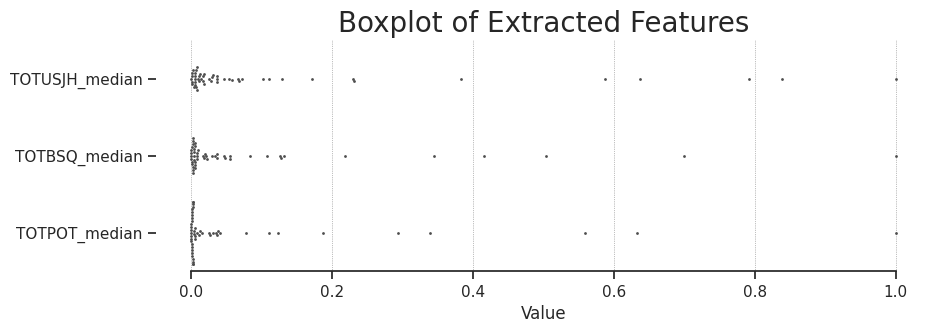

In [12]:
fe.plot_boxplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

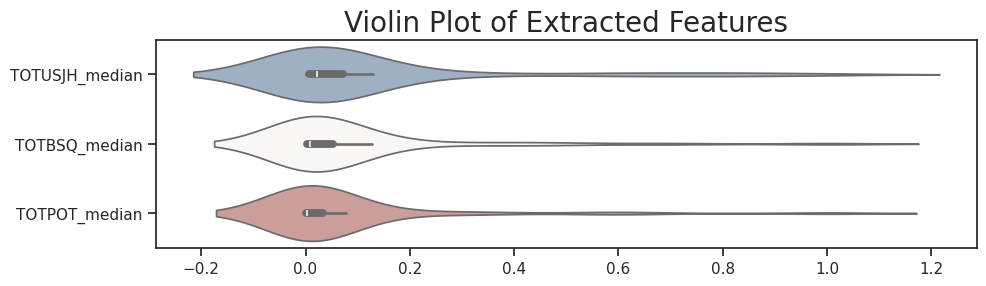

In [13]:
fe.plot_violinplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

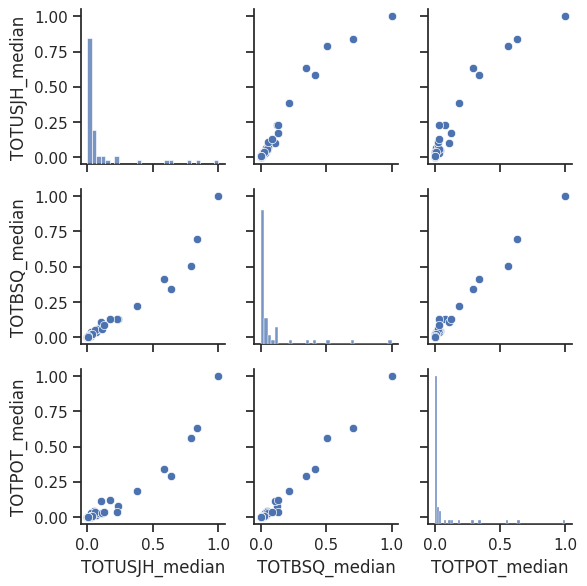

In [14]:
fe.plot_splom(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

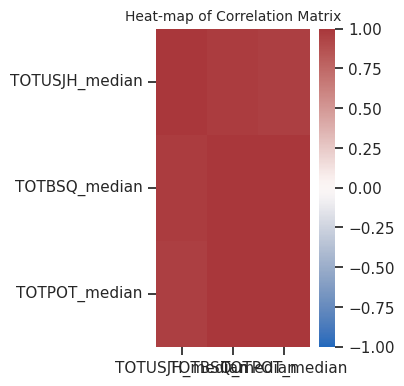

In [15]:
fe.plot_correlation_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

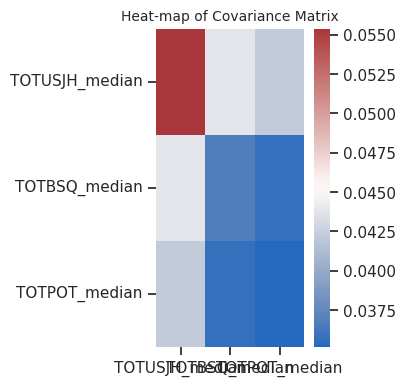

In [16]:
fe.plot_covariance_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

For all of these plots, it is a common practice to have the data normalized before generating such plots. This is automatically done in the above steps. Iin rare cases that normaliztion should not take place, using the `StatVisualizer` class in `stat_visualizer` module, this can be avoided. Simply, set the argument `normalize` in the class constructor to `False`.

Moreover, in any of the above visulization methods, by setting a path to the argument `output_path`, the generated plots can be stored as *png* files, instead of being shown through the GUI.

----

 - #### You have a LARGE dataset?
 No worries. Using the parallel implementation of the feature extraction process, this can be significantly sped up. Let's have 4 processes to extract the features.
 
 **Note** This time we work on all 2000 mvts files, not just the first 50! This is 40 times larger but it takes only 10 times longer (40 times / 4 jobs) than the sequential version.

In [17]:
fe.do_extraction_in_parallel(n_jobs=4,
                             features_name=['get_min', 'get_max', 'get_median'],
                             params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'])
fe.df_all_features[:5]

id lab                   st                   et  TOTUSJH_min  \
0  3439  NF  2013-12-03T11:12:00  2013-12-03T23:00:00    32.107186   
1  3397  NF  2013-11-17T02:00:00  2013-11-17T13:48:00    29.980564   
2  3444  NF  2013-12-03T19:12:00  2013-12-04T07:00:00     7.072219   
3  3482  NF  2013-12-11T06:24:00  2013-12-11T18:12:00   229.818735   
4  3569  NF  2014-01-05T07:00:00  2014-01-05T18:48:00    56.514168   

   TOTUSJH_max  TOTUSJH_median    TOTBSQ_min    TOTBSQ_max  TOTBSQ_median  \
0    43.547975       38.344338  2.430195e+08  3.716977e+08   3.009260e+08   
1    64.393120       42.155892  4.190924e+08  6.907259e+08   5.759903e+08   
2    15.222695       11.087348  5.467813e+07  1.080146e+08   7.975742e+07   
3   276.307744      252.834004  2.934172e+09  3.159505e+09   3.063917e+09   
4   134.292339       96.037765  3.372503e+08  9.421227e+08   6.714850e+08   

     TOTPOT_min    TOTPOT_max  TOTPOT_median  
0  1.703716e+21  2.520771e+21   2.120884e+21  
1  2.260454e+21  6.079490e+21   3.634204e+21  
2  3.222612e+20  6.716479e+20   4.687616e+20  
3  2.216294e+22  2.721777e+22   2.402337e+22  
4  2.427815e+21  7.318491e+21   5.600158e+21

**Note**: Here I am showing only the first 5 rows of the extracted features. Also, keep in mind that the column `id` should be used if we want to compare the results of this table with the one that was sequentially calculated.

## 5. Extracted Features Analysis

- #### A quick look over the results?

The extracted features can be easily summarized using descriptive statistics such as `meam`, `std`, `min`, `max`, and first, second and third quartiles. In addition, any missing value can also be spotted.

In [18]:
from mvtsdatatoolkit.data_analysis.extracted_features_analysis import ExtractedFeaturesAnalysis

efa = ExtractedFeaturesAnalysis(fe.df_all_features, exclude=['id'])
efa.compute_summary()
efa.summary

Feature-Name  Val-Count  Null-Count          mean           std  \
0     TOTUSJH_min     2000.0           0  8.012821e+02  1.427005e+03   
1     TOTUSJH_max     2000.0           0  9.534217e+02  1.610283e+03   
2  TOTUSJH_median     2000.0           0  8.678093e+02  1.501012e+03   
3      TOTBSQ_min     2000.0           0  1.156545e+10  2.196349e+10   
4      TOTBSQ_max     2000.0           0  1.297180e+10  2.372814e+10   
5   TOTBSQ_median     2000.0           0  1.226146e+10  2.286246e+10   
6      TOTPOT_min     2000.0           0  1.960882e+23  4.439333e+23   
7      TOTPOT_max     2000.0           0  2.894560e+23  2.289577e+24   
8   TOTPOT_median     2000.0           0  2.071366e+23  4.596827e+23   

            min          25th          50th          75th           max  
0  0.000000e+00  3.273820e+01  1.908205e+02  8.507221e+02  1.019574e+04  
1  3.994395e+00  5.781455e+01  2.742351e+02  1.065783e+03  1.152325e+04  
2  1.490241e+00  4.367289e+01  2.270971e+02  9.560433e+02  1.063433e+04  
3  0.000000e+00  2.644623e+08  1.859199e+09  1.160760e+10  1.354621e+11  
4  2.149169e+07  4.384896e+08  2.773385e+09  1.345348e+10  1.431918e+11  
5  8.785394e+06  3.580180e+08  2.249029e+09  1.253193e+10  1.413469e+11  
6  0.000000e+00  1.727556e+21  1.302453e+22  1.672474e+23  3.176636e+24  
7  1.085579e+20  3.153874e+21  2.161927e+22  1.954215e+23  8.101464e+25  
8  4.463689e+19  2.454831e+21  1.661687e+22  1.801092e+23  3.284844e+24

... which gives a summary statistics over every extracted feature. For instance, in row `0` that corresponds to the extracted feature `TOTUSJH_min`, the changes of the minimum values of the parameter `TUOTUSJH`, across 2000 mvts files, is described in terms of `mean`, `std`, `min`, `max`, and percentiles `25th` , `50th` (i.e., median), and `75th`. It also indicates that no `NA/NAN` or missing value was generated in the process.

## 6. Data Normalization

The extracted features can also be normalized using four different methods. Below, I use the zero-one normalization to transform values of each time-series (independently) to the `[0,1]` interval.

In [19]:
from mvtsdatatoolkit.normalizing import normalizer

df_norm = normalizer.zero_one_normalize(df=fe.df_all_features, excluded_colnames=['id'])
df_norm

id lab                   st                   et  TOTUSJH_min  \
0     3439  NF  2013-12-03T11:12:00  2013-12-03T23:00:00     0.003149   
1     3397  NF  2013-11-17T02:00:00  2013-11-17T13:48:00     0.002940   
2     3444  NF  2013-12-03T19:12:00  2013-12-04T07:00:00     0.000694   
3     3482  NF  2013-12-11T06:24:00  2013-12-11T18:12:00     0.022541   
4     3569  NF  2014-01-05T07:00:00  2014-01-05T18:48:00     0.005543   
...    ...  ..                  ...                  ...          ...   
1995  3879   C  2014-03-23T07:48:00  2014-03-23T19:36:00     0.135047   
1996  3364   C  2013-11-17T20:24:00  2013-11-18T08:12:00     0.334459   
1997  3473   C  2013-12-14T21:24:00  2013-12-15T09:12:00     0.298557   
1998  3320  NF  2013-10-31T09:12:00  2013-10-31T21:00:00     0.005425   
1999  3480  NF  2013-12-09T13:36:00  2013-12-10T01:24:00     0.007772   

      TOTUSJH_max  TOTUSJH_median  TOTBSQ_min  TOTBSQ_max  TOTBSQ_median  \
0        0.003434        0.003466    0.001794    0.002446       0.002067   
1        0.005243        0.003825    0.003094    0.004674       0.004013   
2        0.000975        0.000903    0.000404    0.000604       0.000502   
3        0.023640        0.023638    0.021660    0.021918       0.021616   
4        0.011311        0.008892    0.002490    0.006430       0.004689   
...           ...             ...         ...         ...            ...   
1995     0.139187        0.137393    0.126427    0.136836       0.124413   
1996     0.324885        0.336925    0.356734    0.367171       0.362011   
1997     0.291306        0.293454    0.303919    0.306069       0.297022   
1998     0.008119        0.006887    0.002462    0.003356       0.002853   
1999     0.009363        0.008813    0.005645    0.005941       0.005602   

      TOTPOT_min  TOTPOT_max  TOTPOT_median  
0       0.000536    0.000030       0.000632  
1       0.000712    0.000074       0.001093  
2       0.000101    0.000007       0.000129  
3       0.006977    0.000335       0.007300  
4       0.000764    0.000089       0.001691  
...          ...         ...            ...  
1995    0.080576    0.003829       0.084736  
1996    0.238200    0.009920       0.239601  
1997    0.231794    0.009351       0.226437  
1998    0.000638    0.000043       0.000766  
1999    0.001993    0.000097       0.002133  

[2000 rows x 13 columns]

**Note**: The argument `excluded_colnames` is used to keep the column `id` unchanged in the normalization process. Although this column is numeric, normalization of its values would be meaningless. Moreover, any other column with non-numeric values were automatically preserved in the output.

## 7. Data Sampling

Very often our dataset suffers from the class-imbalance issue, especially when we are dealing with forecast/classification of natural phenomena. There are several generic methods in `sampling.sampler` module that allow a variety of different undersampling and oversampling techniques. Below, I will show some of them.

**Note**: Our dataset has 5 class labels, namely `X`, `M`, `C`, `B`, and `NF`.

First, I create a `Sampler` and check out the population of each class.

In [20]:
from mvtsdatatoolkit.sampling.sampler import Sampler

sampler = Sampler(extracted_features_df=fe.df_all_features, label_col_name='lab')
sampler.original_class_populations

{'NF': 1524, 'M': 115, 'C': 335, 'X': 16, 'B': 10}

- #### Sampling by size?

Suppose I want only 100 instances of `NF` class, nothing from `M`, all of the `X` and `C` instances, 20 of the `B` class.

In [21]:
desired_populations = {'X': -1, 'M': 0, 'C': -1, 'B': 20, 'NF': 100}
sampler.sample(desired_populations=desired_populations)
sampler.sampled_class_populations

{'NF': 100, 'M': 0, 'C': 335, 'X': 16, 'B': 20}

Which gives me exactly what I asked for. Note that I used *-1* to indicate that I want *all* instances of the `X` and `C` classes. Also, see how I received 20 instances of `B` class while there was originally only 10 insances of that class in the dataset. This allows a seamless *undersampling* and *oversampling*.

Let's make sure that the sampled dataframe has changed as I wanted.

In [22]:
print('Original shape: {}'.format(sampler.original_mvts.shape))
print('Sampled shape: {}'.format(sampler.sampled_mvts.shape))

Original shape: (2000, 13)
Sampled shape: (471, 13)


471 rows (= 100 + 335 + 0 + 20 + 16) is indeed what I wanted.

- #### Sampling by ratio?

The `Sampler` class allows sampling using the desired *ratio*s as well. This is particularly handy when a specific balance ratio is desired.

Suppose I need 50% of the entire population to come from `NF` class, nothing from `M` or `B` class, all of `X` class, and 20% from the `C` class.

In [23]:
desired_ratios = {'X': -1, 'M': 0.0, 'C': 0.20, 'B': 0.0,'NF': 0.50}
sampler.sample(desired_ratios=desired_ratios)
sampler.sampled_class_populations

{'NF': 1000, 'M': 0, 'C': 400, 'X': 16, 'B': 0}

Which is the exact ratios I asked for.

**Note**: I received 400 `C` instances while the dataset contains only 335 instances of `C` class.

**Note**: The desired ratios do not have to add up to 1. This allows users to do both *undersampling* and *oversampling* using ratios.

For more sampling methodologies implemented in `Sampler` class, see the documentation of the class.

----

## Final Note

In case
* you noticed any issue/bug in this demo or in the *MVTSData Toolkit* package, or
* there are other functionalities that you found it useful for your domain, but they are nor implemented here, or
* you have some ideas and you are willing to help us improve this package through a *pull request*,

please don't hesitate to contanct me (*aahmadzadeh1[at]cs[dot]gsu[dot].com*).

----

### Citation

Pleace cite this work if it comes handy in your research.

Currently, this package is under review in [SoftwareX journal](https://www.journals.elsevier.com/softwarex). If you are interested in using this, I can share the manuscrip with you. Till it is published, it can be cited as follows:

```
@article{ahmadzadeh2020mvts,
  title={MVTS-Data Toolkit: A Python Package for Preprocessing Multivariate Time Series Data}},
  author={Azim Ahmadzadeh, Kankana Sinha, Berkay Aydin, Rafal A. Angryk},
  journal={SoftwareX},
  volume={},
  pages={},
  year={under-review},
  publisher={Elsevier}
}
```